# House Sales Price

<br>
<img src="img/house_sale.png">
<br>

Os preços de venda de casas de conjunto de dados para King County, Seattle. Inclui casas vendidas entre maio de 2014 e maio de 2015. O conjunto de dados fornece recursos que as casas têm e o preço pelo qual elas foram vendidas. Pode ser usado para modelar a previsão de preços de casas.

O conjunto de dados está disponível em kaggle [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)

Alguns dos atributos capturados no conjunto de dados são

- Número de quartos e banheiros
- Total de pés quadrados 
- Quantos andares
- Se tem um porão e tamanho do porão
- Classificação da casa
- Clima tem beira-mar e a qualidade da vista
- Quando a casa foi construída e se a casa é renovada, se for renovado
- Latitude e longitude
- preço da casa
- Quando a casa foi vendida

Perguntas:


- Quais as 10 casas com a melhor relação custo/benefício do preço por metro quadrado?
- Qual a correlação do nível de classificação as casas em relação ao seu preço?
- Podemos afirmar que estar de frente para o lago representa um fator que eleva o preço médio das casas, com uma confiança superior a 95%?

Levante algumas hipóteses a sua escolha e comprove se é possível não-rejeitar ou rejeitar, respondendo se as médias são estatisticamente iguais/equivalentes ou estatisticamente diferentes/significativas.


## Lendo e conhecendo o dataset

In [1]:
# importando as bibiotecas
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
# ignorando os warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Lendo e armazenando os daods em um DataFrame
df_raw = pd.read_csv('C:/Users/Luiz Philipe Rangel/Dropbox/PC/Desktop/TERA - AULAS\Aula 13 - Testes de hipotes e calculo de amostragem/data/kc_house_data.csv')

In [3]:
df_raw

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
# criando uma cópia do DataFrame para não precisar 
# importar os dados novamente em caso de necessidade
df = df_raw.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
# verificando o tamnho do DataFrame
df.shape

(21613, 21)

In [59]:
# Calculando o custo benefício do imóveis preço/metro quadrado"
df['custo_benef'] = (df['price']/df['sqft_living'])

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,custo_benef
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,39.274336
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,70.428067
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,22.326966
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,120.800000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,67.972811


In [71]:
# selecioando os dez valores com menor relação de preço por pé quadrado
df_cb = df['custo_benef'].sort_values()[:10]
df_cb

18262    87.588235
3785     87.647059
13825    87.713311
17197    88.000000
1385     88.028169
6523     88.083700
14993    88.150289
12185    88.541667
8200     88.541667
18590    88.698630
Name: custo_benef, dtype: float64

In [72]:
# selecioando as dez casas com menor relação de preço por pé quadrado
df['custo_benef'].sort_values()[:10].index.values

array([18262,  3785, 13825, 17197,  1385,  6523, 14993, 12185,  8200,
       18590], dtype=int64)

<AxesSubplot:>

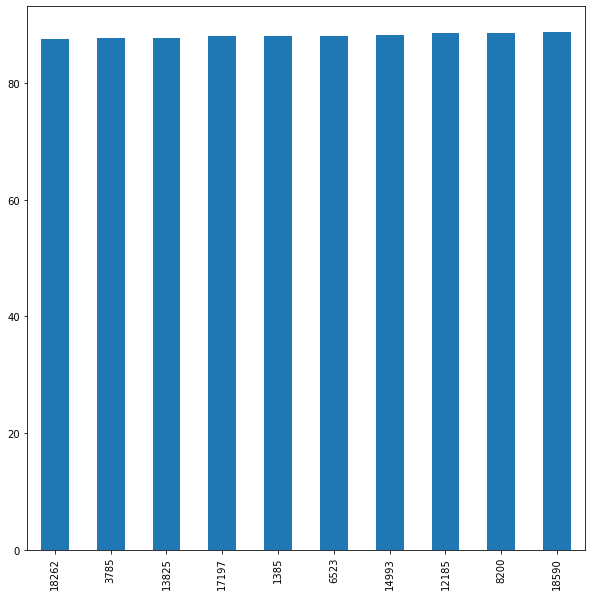

In [73]:
#Plotando as 10 casas com melhores custo benefício
df_cb.plot.bar(x = 'id', y = 'custo_benef', figsize=(10,10))

In [12]:
# Olhando para a Clasificação x preços das casas

In [13]:
df.grade.value_counts(3)

7     0.415537
8     0.280757
9     0.120992
6     0.094295
10    0.052468
11    0.018461
5     0.011197
12    0.004164
4     0.001342
13    0.000601
3     0.000139
1     0.000046
Name: grade, dtype: float64

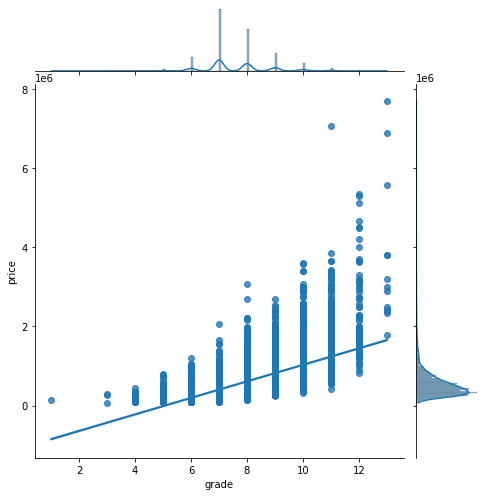

In [76]:
import seaborn as sns
# dispersão dos preços das casas pela classificação
sns.jointplot(x="grade", y="price", data=df, kind = 'reg',fit_reg= True, size = 7)
plt.show()

In [79]:
# cálculo da correlação entre os preços das casas e a classificação
np.corrcoef(x=df.grade, y=df.price)

array([[1.        , 0.66743426],
       [0.66743426, 1.        ]])

In [14]:
# armazenar o nivel de classificação das casas e class
nivel_class = df.grade.value_counts(3).index
nivel_class

Int64Index([7, 8, 9, 6, 10, 11, 5, 12, 4, 13, 3, 1], dtype='int64')

In [15]:
# cálculo da média dos dos preços das casas por nivle de classificação

keys = []
values = []
nivel_list = []

for nivel in nivel_class:
    keys.append(nivel)
    values.append(round(df[df['grade'] == nivel]['price'].mean(),2))
    
nivel_list = list(zip(keys, values))
nivel_list

[(7, 402590.26),
 (8, 542852.77),
 (9, 773513.19),
 (6, 301919.64),
 (10, 1071771.07),
 (11, 1496841.73),
 (5, 248523.97),
 (12, 2191222.0),
 (4, 214381.03),
 (13, 3709615.38),
 (3, 205666.67),
 (1, 142000.0)]

In [16]:
# armanzenando os a media dos preços das casas x novel de classificação
df_nivel = pd.DataFrame(nivel_list,columns=['nivel_class','media_price'])
df_nivel.sort_values(by=['media_price'],ascending=False)

,nivel_class,media_price
9,13,3709615.38
7,12,2191222.00
5,11,1496841.73
4,10,1071771.07
2,9,773513.19
1,8,542852.77
0,7,402590.26
3,6,301919.64
6,5,248523.97
8,4,214381.03


<AxesSubplot:xlabel='nivel_class'>

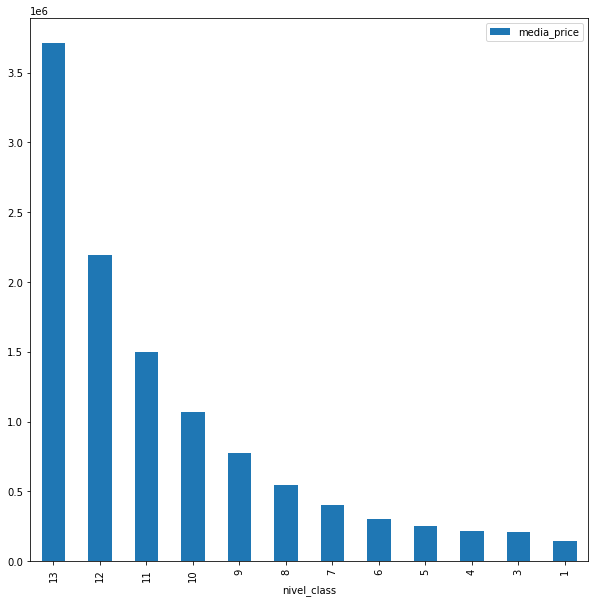

In [17]:
# plotando a média dos preços dos imóveis por nivel de classificação
df_nivel.sort_values(by=['media_price'],ascending=False).plot.bar(x = 'nivel_class', y = 'media_price', figsize=(10,10))

In [18]:
# segundo o gráfico acima quanto maior o nivel de classificação do imóvel maior o preço

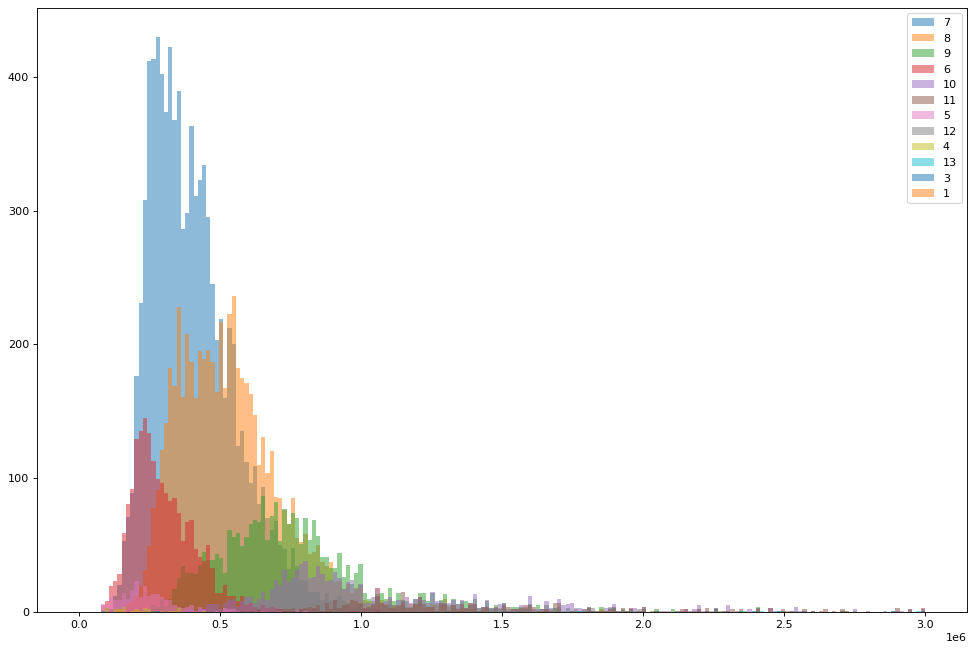

In [19]:
# plotando as distribuições dos preços das casas por nivel de classificação

from matplotlib import pyplot
%matplotlib inline

bins = 200

from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=80)

for j in nivel_class:
    ax = pyplot.hist(df[df['grade'] == j]['price'], bins, alpha=0.5, label=j, range=(0,3000000))

pyplot.legend(loc='upper right')
pyplot.show()

In [20]:
# Quantos imóveis estão com o valor venal acima e abaixo da média no nivel de classificação 7?

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<AxesSubplot:>

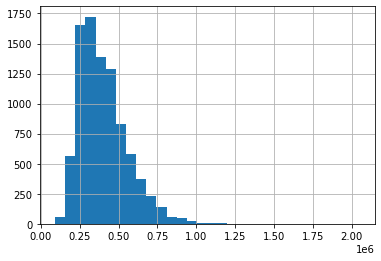

In [22]:
# Plotagem da distribuição dos preços da nivel de classificação "7"
df[df.grade == 7]['price'].hist(bins=30)

In [23]:
# cálculo da média e desvio-padrão da série de preços para classificação 8"

x = df[df.grade == 8]['price']

mu = np.mean(x)
std = np.std(x)
mu,std

(542852.7656558998, 217455.45009014464)

In [24]:
# cálculo da densidade de probabilidade para dois desvios-padrão
scipy.stats.norm(mu, std).pdf(2*std/(len(x)**0.5))

8.669280113457916e-08

In [25]:
# cálculo do intervalo de confiança para 95% de nível de confiança
scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)

(116647.91523726902, 969057.6160745305)

In [29]:
# fazendo o teste de normalidade de shapiro
stats.shapiro(df[df.grade == 7]['price'])

ShapiroResult(statistic=0.9265250563621521, pvalue=0.0)

In [27]:
#O test shapiro-wilks é um indicador de quão bem os nossos dados se ajustam à distribuição normal.
#O primeiro parâmetro da estatística W (quando está próxiomo de 1 a distribuição é Gaussiana), 
#e o segundo parâmetro é o p_valor (quando p_valor é maior que 0.05, a distribuição é Gaussiana).

In [28]:
#Pelo teste de Shapiro a distribuição não é normal, por isso vamos utilizar técnicas de transformação para melhorar os resultados

<AxesSubplot:ylabel='Frequency'>

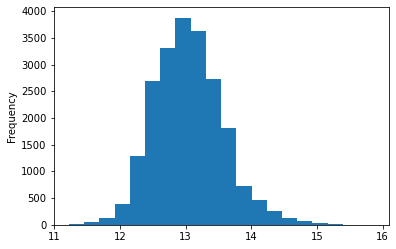

In [30]:
# aplicando o LOG na série de dados de preço e plotando uma distribuição
# transformação matemática de NORMALIZAÇÃO dos dados
df['log_price'] = np.log(df['price'])
df['log_price'].plot.hist(bins=20)

<AxesSubplot:>

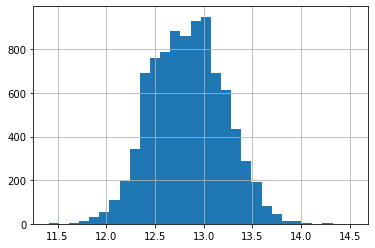

In [32]:
# Plotagem da distribuição dos preços da nivel de classificação "7"
df[df.grade == 7]['log_price'].hist(bins=30)

In [34]:
# fazendo o teste de normalidade de shapiro
stats.shapiro(df[df.grade == 7]['log_price'])

ShapiroResult(statistic=0.997687578201294, pvalue=1.7587668821317237e-10)

In [35]:
# agora sim a distribuição está normal

In [36]:
# definição de um DataFrmae somente com os preços de de nivel de classificação 7
nivel_7 = df[df.grade == 7]
nivel_7.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,custo_benef,log_price
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,39.274336,12.309982
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,70.428067,13.195614
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,120.800000,13.311329
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,0,1995,0,98003,47.3097,-122.327,2238,6819,37.762135,12.458775
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,0,1963,0,98198,47.4095,-122.315,1650,9711,30.053548,12.583995


<AxesSubplot:>

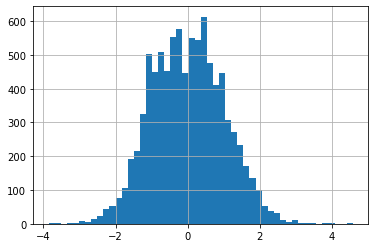

In [37]:
# padronizando os dados da série com os preços de nivel de classificação 7
nivel_7['norm_price'] = (nivel_7['log_price'] - nivel_7['log_price'].mean()) / nivel_7['log_price'].std()
nivel_7['norm_price'].hist(bins=50)

In [38]:
# verificando o número de observações
len(nivel_7['norm_price'])

8981

In [39]:
# calculando a média e o desvio-padrão dos preços de nivel de classificação 7
x = nivel_7['norm_price']

mu = np.mean(x)
std = np.std(x)
mu,std

(1.0616425775332606e-14, 0.9999443253625359)

In [40]:
# Verificando o Z-score dos preços de nivel de classificação 7

scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)

(-1.9598548642557614, 1.9598548642557827)

In [42]:
# Verificando o p-values dos preços de nivel de classificação 7

scipy.stats.norm(mu, std).pdf(2*std)

0.05399397260803942

In [43]:
#Nivel de classificação 7  que têm o preço abaixo da média 

In [44]:
# filtro do nivel de classificação abaixo do preço médio com 95% de confiança
nivel_7[nivel_7['norm_price']<scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)[0]]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,custo_benef,log_price,norm_price
92,4168000060,20150226T000000,153000.0,3,1.00,1200,10500,1.0,0,0,...,1962,0,98023,47.3220,-122.351,1350,10500,14.571429,11.938193,-2.424130
183,6661200320,20140723T000000,163500.0,2,1.50,1050,3419,2.0,0,0,...,1996,0,98038,47.3848,-122.039,1050,3417,47.848990,12.004568,-2.245011
533,2008200060,20140624T000000,160000.0,3,1.50,1010,9600,1.0,0,0,...,1962,0,98198,47.4097,-122.316,1400,9660,16.563147,11.982929,-2.303406
618,9407110700,20150113T000000,175000.0,3,1.00,1250,9775,1.0,0,0,...,1971,0,98045,47.4474,-121.771,1390,9650,18.134715,12.072541,-2.061580
859,1865820370,20141113T000000,166600.0,3,1.75,1150,8690,1.0,0,0,...,1977,0,98042,47.3729,-122.115,1330,7040,23.664773,12.023351,-2.194324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19524,3306200230,20150303T000000,147000.0,3,1.50,1480,9606,1.0,0,0,...,1964,0,98023,47.2978,-122.363,1600,9619,15.282254,11.898188,-2.532088
19650,2626119062,20141112T000000,155000.0,3,1.00,1300,6098,1.0,0,0,...,2013,0,98014,47.7074,-121.364,1300,6849,22.631041,11.951180,-2.389083
19975,6056100165,20141201T000000,175003.0,3,1.50,1390,1882,2.0,0,0,...,2014,0,98108,47.5667,-122.297,1490,2175,80.461149,12.072558,-2.061533
20403,6056100150,20140623T000000,160797.0,3,1.50,1270,2356,2.0,0,0,...,2012,0,98108,47.5671,-122.298,1490,2175,73.929655,11.987898,-2.289997


In [45]:
len(nivel_7[nivel_7['norm_price']<scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)[0]])

176

In [ ]:
# 176 imóveis com classificação 7 possuem preços abaixo da média

In [46]:
# filtro do nivel de classificação acima do preço médio com 95% de confiança
nivel_7[nivel_7['norm_price']>scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)[1]]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,custo_benef,log_price,norm_price
95,1483300570,20140908T000000,905000.0,4,2.50,3300,10250,1.0,0,0,...,1946,1991,98040,47.5873,-122.249,1950,6045,149.710505,13.715690,2.372602
128,2331300505,20140613T000000,822500.0,5,3.50,2320,4960,2.0,0,0,...,1926,0,98103,47.6763,-122.352,1700,4960,165.826613,13.620104,2.114654
337,2877103726,20140722T000000,791500.0,4,2.00,1510,3500,1.5,0,0,...,1911,0,98103,47.6794,-122.357,1820,3750,211.066667,13.581685,2.010978
358,325059171,20140505T000000,900000.0,3,1.00,1330,77972,1.0,0,0,...,1928,1954,98033,47.6891,-122.159,1340,17689,50.879077,13.710150,2.357652
659,708000030,20140902T000000,888000.0,3,1.50,1250,8710,1.0,0,0,...,1953,0,98004,47.6245,-122.198,1750,9185,96.679369,13.696727,2.321428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19337,9136100056,20140528T000000,875000.0,3,2.75,2280,4280,1.0,0,0,...,1917,0,98103,47.6685,-122.335,1650,4280,204.439252,13.681979,2.281630
19381,868000905,20140708T000000,950000.0,3,2.50,3480,7800,1.0,0,0,...,1941,1998,98177,47.7047,-122.378,3010,9918,95.785441,13.764217,2.503557
19425,9528102865,20150226T000000,794500.0,5,3.00,3030,4120,1.5,0,0,...,1913,0,98115,47.6771,-122.319,1280,3090,257.119741,13.585468,2.021187
19534,5078400035,20150402T000000,875000.0,4,1.75,2360,8286,1.0,0,0,...,1952,0,98004,47.6226,-122.205,1680,7630,114.678899,13.681979,2.281630


In [47]:
len(nivel_7[nivel_7['norm_price']>scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)[1]])

200

In [48]:
# 200 imóveis com classificação 7 possuem preços acima da média

In [49]:
#Podemos afirmar que estar de frente para o lago representa um fator que eleva 
#o preço médio das casas, 
#com uma confiança superior a 95%?

In [50]:
# Agrupamento dos dados baseado no atributo 'waterfront/logprice', contando e somando os registros
vista = df.groupby(['waterfront'])['log_price'].sum()
vista


waterfront
0    279703.740356
1      2298.726674
Name: log_price, dtype: float64

<AxesSubplot:xlabel='waterfront'>

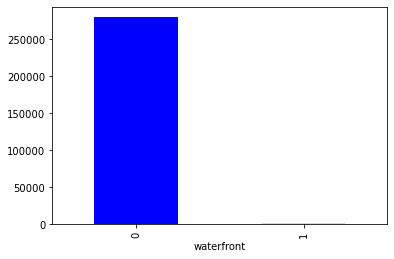

In [51]:
# Gráfico de barras
vista.plot.bar(color = ['blue','pink'])

In [53]:
#calculando o desvio padrão

In [54]:
df.groupby(['waterfront']).log_price.std()**2

waterfront
0    0.267424
1    0.471537
Name: log_price, dtype: float64

In [52]:
#Aplicando o teste para duas médias do ScipyStats (utilizando o t-Statistic)
# Comparando com waterfront e sem waterfront

In [56]:
# aplicando o t-test para médias de duas séries entre  com waterfront e sem waterfront
stats.ttest_ind(a=df.log_price[df.waterfront == 0],
                b=df.log_price[df.waterfront == 1], 
                equal_var = False)

Ttest_indResult(statistic=-19.71787938655812, pvalue=4.608589710240067e-45)

In [58]:
#Para um p-values menor que 0.05, as médias das duas séries são estatísticamentediferentes, 
#concluindo que o preço dos imóveis que possuem vista para o lago são maiores que os demais que não tem vista 